Importing the dependencies


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2  #computer vision library
from google.colab.patches import cv2_imshow # To display image 
from PIL import Image 
import tensorflow as tf 
tf.random.set_seed(3) 
from tensorflow import keras                
from keras.datasets import mnist          
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
# shape of the numpy array 
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


It has 60000 training data images with dimesion of 28*28  which is gray scale image. label are stored in y_train and y_test

It has 10000 test data images 

Grayscale data -- 1 Channel 

Pixel values ranges from 0 to 255

0 - black 

255 - white 

digit label range in the range 0-9


In [5]:
# Print the 10th image 
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape) # Single image dimesion 

(28, 28)


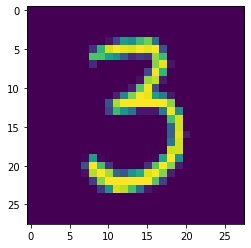

3


In [7]:
# Displaying the image 

plt.imshow(x_train[50])
plt.show()

# Print the corresponding the label 
print(y_train[50])

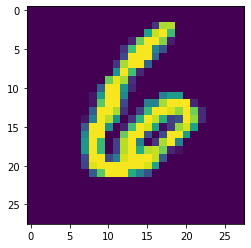

6


In [8]:
plt.imshow(x_train[13])
plt.show()
print(y_train[13])

Image Labels

In [9]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [10]:
# Unqiue values in y_train and y_test

print(np.unique(y_train)) # To find the unique values in the y_train 
print(np.unique(y_test)) # To find the unique values in y_test

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Labels can be used as such or we can apply One Hot Encoding

In [11]:
# All the images should be in the same dimension in the dataset, if not we have resize all the images to a common dimension 


In [12]:
# Scaling the values 

x_train = x_train/255 
x_test = x_test/255 # To improve the accuracy and it should be divided by the maximum value


The neural network understands the numerical values between 0 to 1 

In [13]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network 

In [14]:
# we building basic neural network and not using CNN

#setting up the layers of the neural network 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation ='relu'),
    keras.layers.Dense(10, activation='sigmoid') #10 means number of unique values or classes

])

In [15]:
# Compiling the neural network 

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Training the neural network 

model.fit(x_train,y_train,epochs=50) # train the model as we do in machine learning 

#the loss function must be less, if it high the model is not right

Epoch 1/50
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2979 - accuracy: 0.9137
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1346 - accuracy: 0.9599
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0998 - accuracy: 0.9696
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0820 - accuracy: 0.9748
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0684 - accuracy: 0.9790
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0602 - accuracy: 0.9815
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0509 - accuracy: 0.9841
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0465 - accuracy: 0.9852
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9873
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

Training data accuracy = 99 %

In [17]:
# Accuracy on test data 

loss , accuracy = model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1968 - accuracy: 0.9755
0.9754999876022339


Test data accuracy = 97 % 

In [18]:
print(x_test.shape)

(10000, 28, 28)


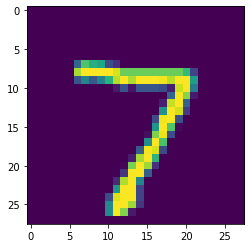

In [19]:
plt.imshow(x_test[0])
plt.show()

In [20]:
print(y_test[0])

7


In [21]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [22]:
print(y_pred.shape)

(10000, 10)


In [23]:
print(y_pred[0]) 

[4.5571454e-05 3.0484293e-06 1.2395504e-06 1.5266736e-03 1.1133854e-10
 2.4763165e-12 1.5242413e-16 1.0000000e+00 2.2903832e-07 9.3616611e-01]


model.predict() gives the prediction probability of each class for that data point

In [24]:
# converting the prediction probabilities to class label 

label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image) # index of the number which is maximum

7


In [25]:
# converting the prediction probabilities to class label for all test datapoints

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

#final prediction made by the model

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 4, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 2, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 1, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test --> True labels 

y_pred_labels ---> predicted labels 

In [26]:
# Confusion matrix 

conf_mat = confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 971    1    0    0    0    1    2    0    1    4]
 [   0 1125    0    1    0    2    2    1    4    0]
 [   4   29  974    0    3    3    1    9    7    2]
 [   0    6   11  975    0    4    0    4    4    6]
 [   1    1    2    1  966    1    1    1    1    7]
 [   1    1    0   27    3  845    3    1    9    2]
 [   8    3    0    1   15   13  917    0    1    0]
 [   2    5    9    4    2    0    0  997    3    6]
 [   2    1   11    8    5    6    3    4  928    6]
 [   2    5    1    5   63    5    0   16    1  911]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted labels')

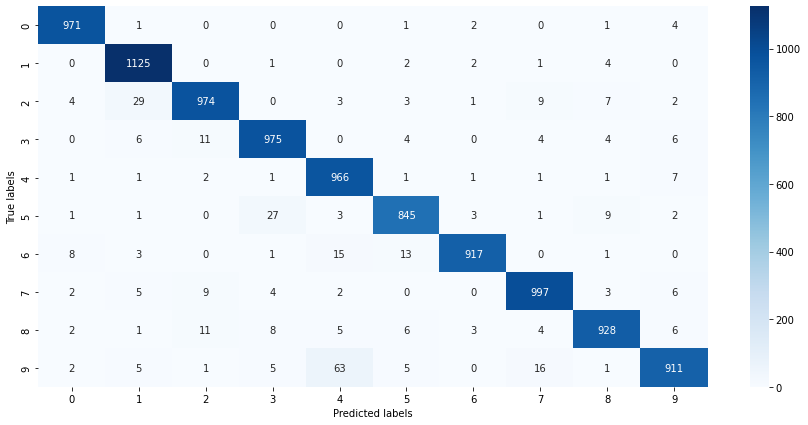

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True,cmap='Blues',fmt='d')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

In [28]:
# building a predictive system 

In [29]:
input_image_path = '/content/sample_data/MNIST_digit.png'

In [30]:
input_image = cv2.imread(input_image_path)

In [31]:
type(input_image)

numpy.ndarray

In [32]:
input_image.shape

(318, 318, 3)

In [34]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [35]:
grayscale.shape

(318, 318)

In [36]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [38]:
input_image_resize.shape

(28, 28)

In [39]:
cv2_imshow(input_image_resize)

In [40]:
input_image_resize = input_image_resize/255

In [41]:
input_image_resize

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [43]:
type(input_image_resize)

numpy.ndarray

In [42]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [45]:
input_prediction = model.predict(image_reshaped)

1/1 [==============================] - 0s 37ms/step


In [46]:
print(input_prediction)

[[2.0882634e-28 8.5262209e-01 8.6841964e-11 1.0000000e+00 8.2237840e-27
  4.2587118e-08 0.0000000e+00 3.6657904e-04 5.1832618e-04 7.8546236e-07]]


In [47]:
input_pred_label = np.argmax(input_prediction)

In [48]:
print(input_pred_label)

3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize / 255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as',input_pred_label)